In [351]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import datetime as dt
import calendar as cal

In [352]:
df_train = pd.read_csv('train.csv')
df_train_label = pd.read_csv('train_label.csv', header=None)
df_test = pd.read_csv('test.csv')
df_test_label = pd.read_csv('test_label.csv', header=None)

In [353]:
print(df_train.shape)
print(df_train_label.shape)
print(df_test.shape)
print(df_test_label.shape)

(8708, 9)
(8708, 1)
(2178, 9)
(2178, 1)


In [354]:
df_train['Bookings'] = df_train_label

In [355]:
df_train.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Bookings
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5


#### Missing Value Analysis

In [356]:
df_train.isna().any()

datetime      False
season        False
holiday       False
workingday    False
weather       False
temp          False
atemp         False
humidity      False
windspeed     False
Bookings      False
dtype: bool

## Data Visualization

### 1. Bookings' Count Plot

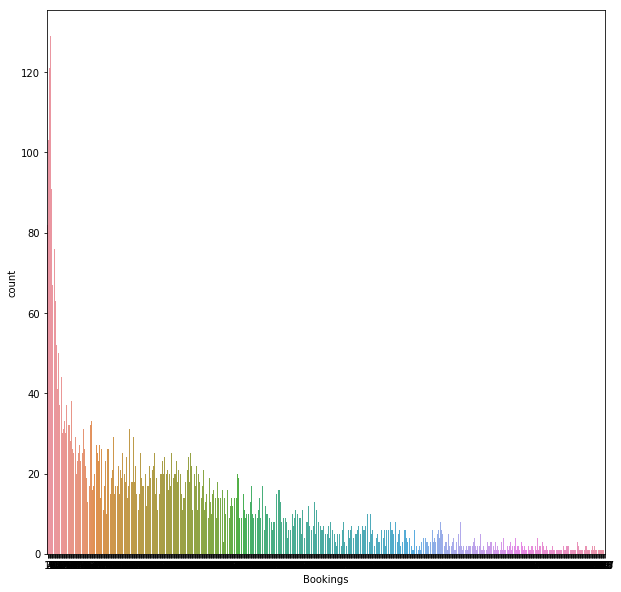

In [357]:
plt.figure(figsize=(10,10))
sns.countplot( df_train['Bookings'])

We can not infer anything from above plot.

### 2. Year wise Total Booking

In [358]:
df_train['date']=df_train.datetime.apply(lambda x:x.split()[0])
df_train['year']=df_train.date.apply(lambda x:x.split("/")[2])

In [359]:
catColumns = []
test = df_train.nunique()
for k, v in enumerate(test):
    if(v < 20):
        catColumns.append(df_train.columns[k])
catColumns

['season', 'holiday', 'workingday', 'weather', 'year']

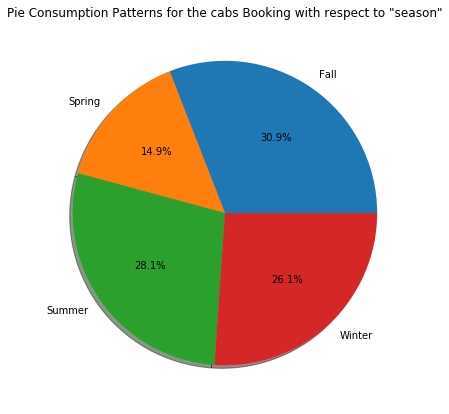

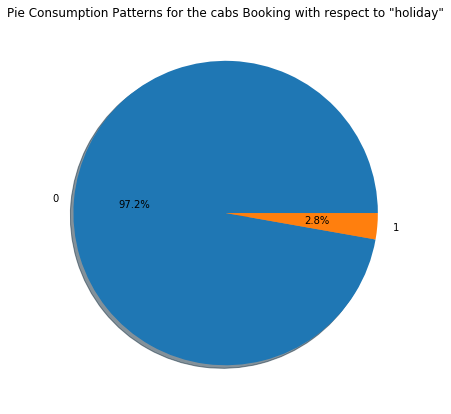

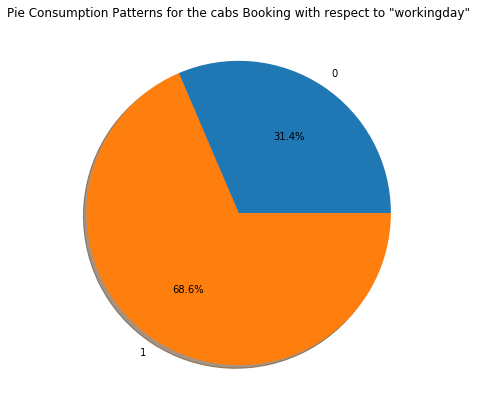

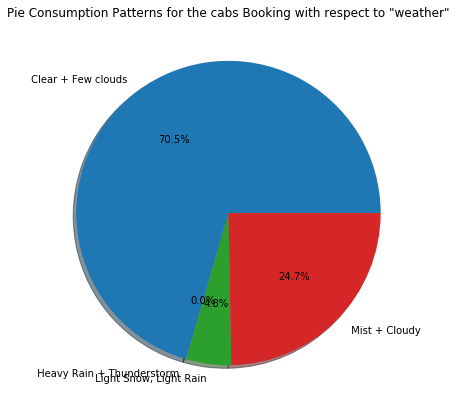

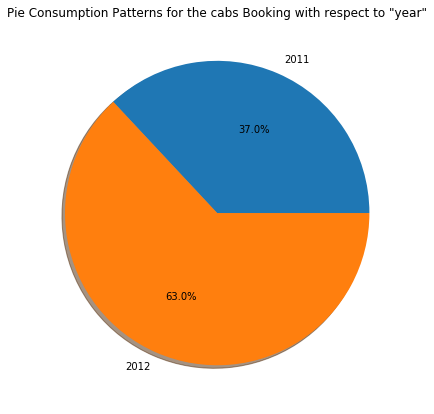

In [362]:
for i, item in enumerate(catColumns):
    sums = df_train.groupby(item)['Bookings'].sum()
    plt.figure(figsize=(7,7))
    plt.pie(sums, labels=sums.index, autopct='%1.1f%%', shadow=True)
    plt.title('Pie Consumption Patterns for the cabs Booking with respect to '+ '"'+item + '"', fontsize=12)

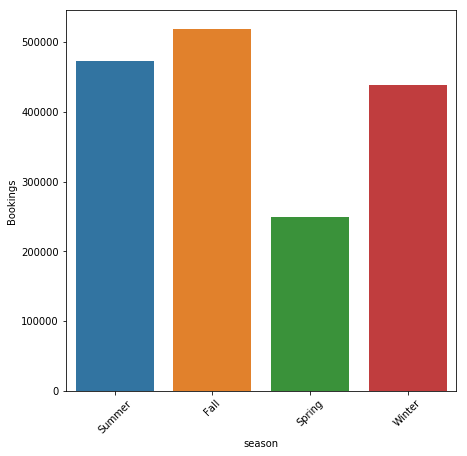

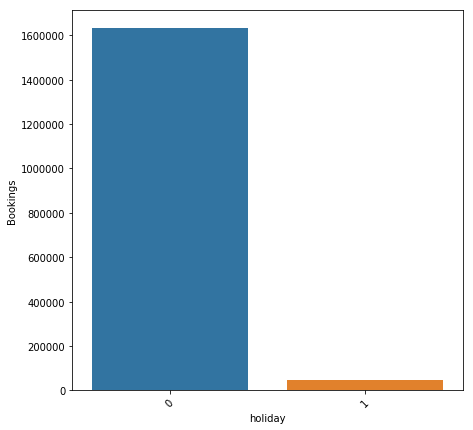

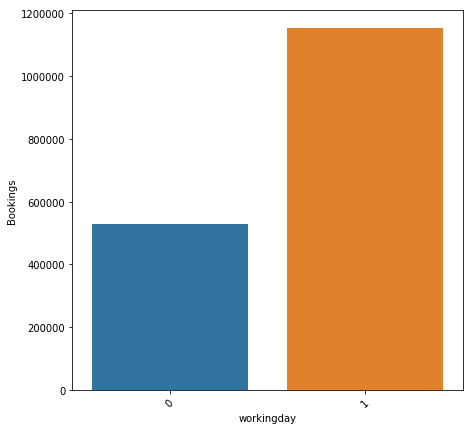

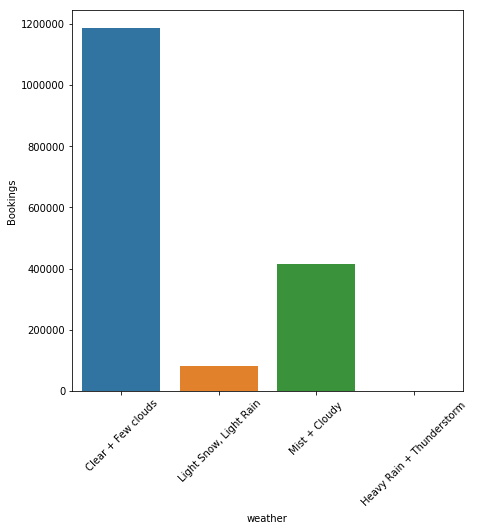

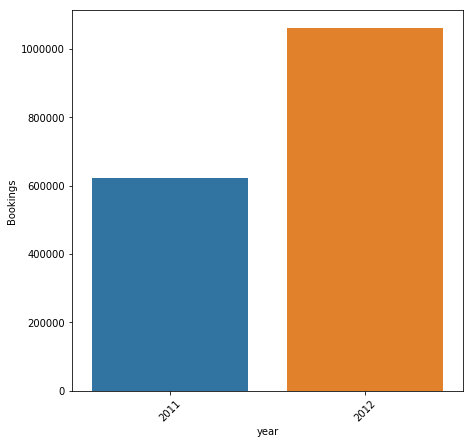

In [363]:
for i, item in enumerate(catColumns):
    plt.figure(figsize=(7,7))
    chart = sns.barplot(x=df_train[item], y='Bookings', data=df_train, estimator=sum, ci=None)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

<Figure size 504x504 with 0 Axes>

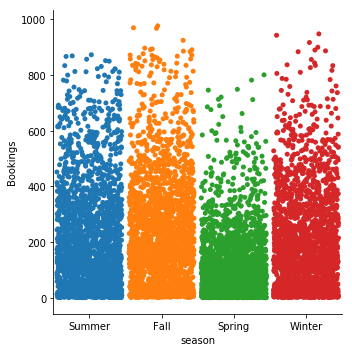

<Figure size 504x504 with 0 Axes>

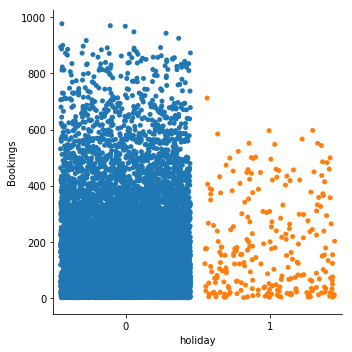

<Figure size 504x504 with 0 Axes>

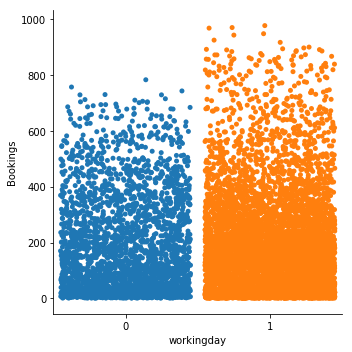

<Figure size 504x504 with 0 Axes>

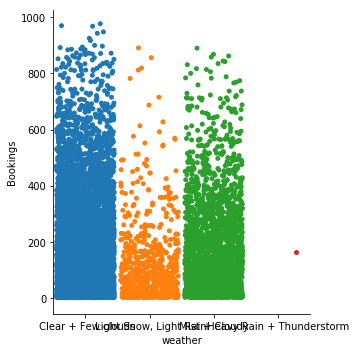

<Figure size 504x504 with 0 Axes>

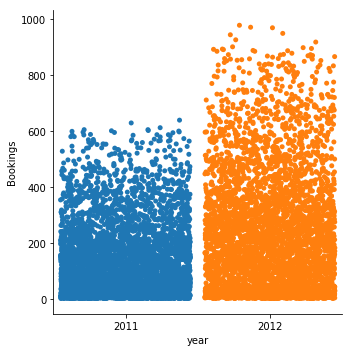

In [364]:
for i, item in enumerate(catColumns):
    plt.figure(figsize=(7,7))
    sns.catplot(x=item, y='Bookings', data=df_train, estimator=sum, jitter='0.45')

Inference : From above plots, followings can be inferred,
    1. Out of 4 seasons, Spring season encountered least number of cab Bookings and Fall got highest.
    2. On Holidays', people booked lesser cabs as compared to non holiday.
    3. Similarly "working day" observed more number of cab Bookings as compared to non-working day. The non-working day can also be a holiday.
    4. On the 'Weather' front, two seasons shown maximum cab bookings 'Clear and Few clouds' and 'Mist and Cloudy'. The weather 'heavy rain and Thunderstorm' has only one booking.
    5. The year 2012 has more bookings than 2011.

### pair plot of temp and atemp

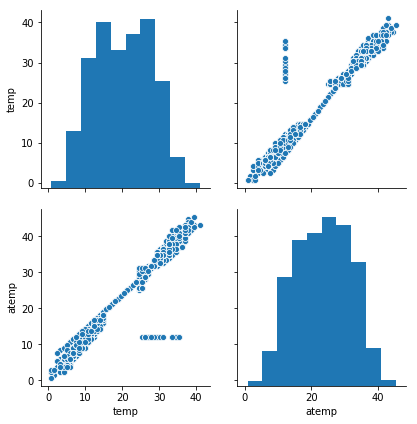

In [378]:
sns.pairplot(df_train, height=3,vars=["temp", "atemp"])

Inference: As it is evident from above plots that 'temp' and 'atemp' are related to each other.

#### Histogram with Humidity 

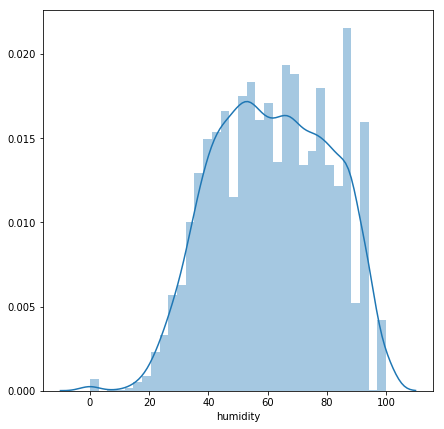

In [365]:
plt.figure(figsize=(7,7))
sns.distplot(df_train.humidity,label='humidity')

Inference : Most of the data lies in mid range of the Humidity, which is 40-85

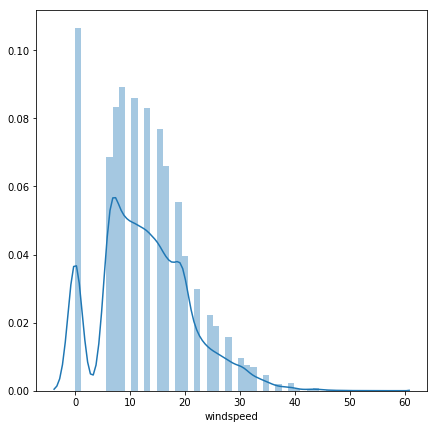

In [366]:
plt.figure(figsize=(7,7))
sns.distplot(df_train.windspeed,label='Windspeed')

Inference : The data looks little right skewed 

### Correlation Analysis

In [203]:
corr = df_train.corr()
corr

,holiday,workingday,temp,atemp,humidity,windspeed,Bookings
holiday,1.000000,-0.249755,-0.000165,-0.005526,-0.004567,0.008075,-0.004391
workingday,-0.249755,1.000000,0.032189,0.026168,-0.009282,0.013035,0.012285
temp,-0.000165,0.032189,1.000000,0.984035,-0.066419,-0.027824,0.397456
atemp,-0.005526,0.026168,0.984035,1.000000,-0.044206,-0.068911,0.392754
humidity,-0.004567,-0.009282,-0.066419,-0.044206,1.000000,-0.320346,-0.307982
windspeed,0.008075,0.013035,-0.027824,-0.068911,-0.320346,1.000000,0.092090
Bookings,-0.004391,0.012285,0.397456,0.392754,-0.307982,0.092090,1.000000


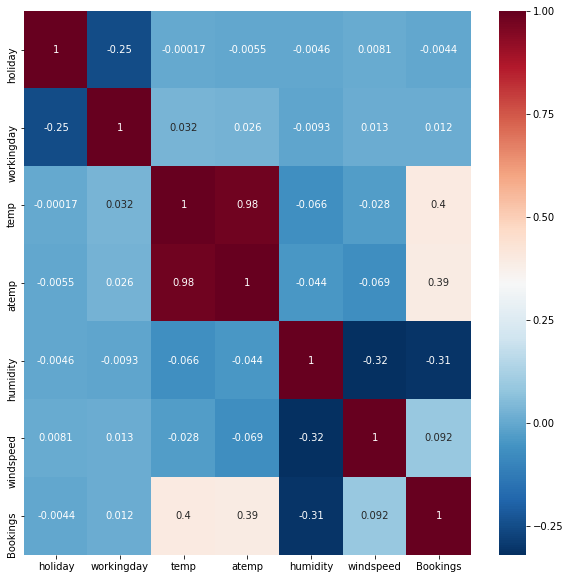

In [204]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='RdBu_r')
plt.show()

Inference : We can infer from above correlation that,
    1. Humidity is negativly correlated to Bookings, as humidity increases Bookings goes down.
    2. temp and atemp columns are highly correlated, so out of those two one can be removed or we can create a new column which will hold the mean value of both.
    3. temp/atemp and windspeed has positive correlation with Bookings.

## Feature Engineering

#### Creating new columns like - date, day, hour, month from datetime column.

In [368]:
df_train.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Bookings,date,year
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,5/2/2012,2012
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,9/5/2012,2012


In [206]:
df_train['hour'] = df_train.datetime.apply(lambda x : x.split()[1].split(':')[0])
df_train['month'] = df_train.date.apply(lambda x : cal.month_name[dt.datetime.strptime(x, '%m/%d/%Y').month])
df_train['weekday'] = df_train.date.apply(lambda x : cal.day_name[dt.datetime.strptime(x, '%m/%d/%Y').weekday()])

In [207]:
catColumns1 = []
test = df_train.nunique()
for k, v in enumerate(test):
    if(v < 20):
        catColumns1.append(df_train.columns[k])
catColumns1

['season', 'holiday', 'workingday', 'weather', 'year', 'month', 'weekday']

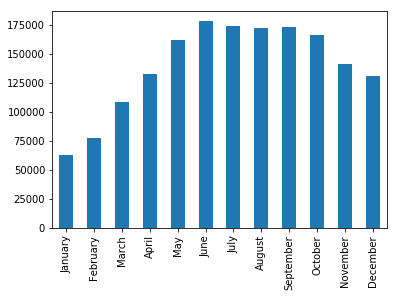

In [208]:
month=['January','February','March','April','May','June','July','August','September','October','November','December']
var = df_train.groupby(pd.Categorical(df_train['month'], categories=month)).Bookings.sum()
ax1.set_xlabel('month')
ax1.set_ylabel('Total Count of bookings')
ax1.set_title("Month wise Count of Total Cab bookings")
var.plot(kind='bar')

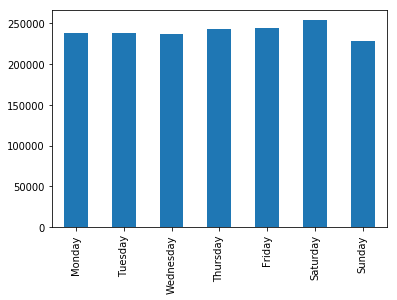

In [209]:
weekday=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
var = df_train.groupby(pd.Categorical(df_train['weekday'], categories=weekday)).Bookings.sum()
ax1.set_xlabel('Weekday')
ax1.set_ylabel('Total Count of bookings')
ax1.set_title("Month wise Count of Total Cab bookings")
var.plot(kind='bar')

Inference : From above two plots of Month and weekday, it can be inferred that
    1. There is low count of bookings in initial months of the year, most in the month of June.
    2. Most cabs are booked on Saturday and least on Sunday. Rest all days have similar number of cabs booked.

In [210]:
df_train['month'] = df_train['datetime'].apply(lambda x:x.split(" ")[0].split("/")[0])
df_train['weekday'] = df_train['datetime'].apply(lambda x:x.split(" ")[0].split("/")[0])
cols = ['weekday', 'hour', 'year', 'month']
for item in cols:
    df_train[item] = df_train[item].astype('str').astype('int')

In [211]:
df_train.dtypes

datetime       object
season         object
holiday         int64
workingday      int64
weather        object
temp          float64
atemp         float64
humidity        int64
windspeed     float64
Bookings        int64
date           object
year            int32
hour            int32
month           int32
weekday         int32
dtype: object

#### Creating a new column Temperature with the mean of temp and atemp

In [212]:
df_train['Temperature'] = (df_train['temp']+df_train['atemp'])/2

## Outlier Analysis

In [213]:
df_train.temp.describe()

count    8708.000000
mean       20.243020
std         7.813494
min         0.820000
25%        13.940000
50%        20.500000
75%        26.240000
max        41.000000
Name: temp, dtype: float64

#### Checking and replacing the outlier with mean value of column

In [214]:
def outlier_analysis(df, col):
    mean = df[col].describe()[1]
    std = df[col].describe()[2]
    lower_bound = mean - (3*std)
    upper_bound = mean + (3*std)
    
    
    outlier_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    print('Range for outlier is ',lower_bound, ' to ', upper_bound)
    print('Outlier data count for ', col, ' : ', outlier_count)
    
    df[col] = df[col].apply(lambda x : mean if(x < lower_bound) or (x > upper_bound) else x)

In [371]:
out_cols = ['temp', 'atemp', 'humidity', 'windspeed']
for item in out_cols:
    outlier_analysis(df_train, item)

Range for outlier is  -3.1974618482995787  to  43.68350227089954
Outlier data count for  temp  :  0
Range for outlier is  -1.8477677762246145  to  49.15887135913707
Outlier data count for  atemp  :  0
Range for outlier is  4.796306415641055  to  118.75690560023713
Outlier data count for  humidity  :  0
Range for outlier is  -10.791726872493369  to  36.0505979184182
Outlier data count for  windspeed  :  0


#### Dropping irrelevant columns

In [216]:
df_train.drop(['datetime', 'temp', 'atemp', 'date'], axis=1, inplace=True)

In [217]:
df_train.dtypes

season          object
holiday          int64
workingday       int64
weather         object
humidity       float64
windspeed      float64
Bookings         int64
year             int32
hour             int32
month            int32
weekday          int32
Temperature    float64
dtype: object

#### Encoding the Object columns ie Season and Weather

In [218]:
df_train=pd.get_dummies(df_train)
print(df_train.shape)
df_train.head(2)

(8708, 18)


,holiday,workingday,humidity,windspeed,Bookings,year,hour,month,weekday,Temperature,season_Fall,season_Spring,season_Summer,season_Winter,weather_ Clear + Few clouds,weather_ Heavy Rain + Thunderstorm,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy
0,0,1,77.0,16.9979,504,2012,19,5,5,23.9500,0,0,1,0,1,0,0,0
1,0,1,79.0,19.0012,5,2012,4,9,9,31.0175,1,0,0,0,1,0,0,0


In [219]:
df_test.shape

(2178, 9)

## Changing the test data as well based on train data

In [220]:
df_test['date']=df_test.datetime.apply(lambda x:x.split()[0])
df_test['year']=df_test.date.apply(lambda x:x.split("/")[2])
df_test['hour'] = df_test.datetime.apply(lambda x : x.split()[1].split(':')[0])
df_test['month'] = df_test['datetime'].apply(lambda x:x.split(" ")[0].split("/")[0])
df_test['weekday'] = df_test['datetime'].apply(lambda x:x.split(" ")[0].split("/")[0])
df_test['Temperature']=(df_test['temp']+df_test['atemp'])/2

In [221]:
df_test.shape

(2178, 15)

In [222]:
df_test.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,date,year,hour,month,weekday,Temperature
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.0,48,35.0008,5/10/2012,2012,11,5,5,23.16


In [223]:
cols = ['weekday', 'hour', 'year', 'month']
for item in cols:
    df_test[item] = df_test[item].astype('str').astype('int')

In [374]:
out_cols = ['temp', 'atemp', 'humidity', 'windspeed']
for item in out_cols:
    outlier_analysis(df_test, item)

Range for outlier is  -2.932694850841017  to  43.29717602623131
Outlier data count for  temp  :  0
Range for outlier is  -1.4559477846934819  to  48.7623757002123
Outlier data count for  atemp  :  0
Range for outlier is  5.311735299563139  to  120.58940398374493
Outlier data count for  humidity  :  0
Range for outlier is  -9.697644766523572  to  34.08846256782109
Outlier data count for  windspeed  :  0


In [225]:
df_test.drop(['datetime', 'temp', 'atemp', 'date'], axis=1, inplace=True)

In [226]:
df_test=pd.get_dummies(df_test)
print(df_test.shape)
df_test.head(2)

(2178, 16)


,holiday,workingday,humidity,windspeed,year,hour,month,weekday,Temperature,season_Fall,season_Spring,season_Summer,season_Winter,weather_ Clear + Few clouds,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy
0,0,1,48.0,35.0008,2012,11,5,5,23.1600,0,0,1,0,1,0,0
1,0,0,64.0,7.0015,2012,7,6,6,25.5275,0,0,1,0,1,0,0


In [231]:
df_train.columns

Index(['holiday', 'workingday', 'humidity', 'windspeed', 'Bookings', 'year',
       'hour', 'month', 'weekday', 'Temperature', 'season_Fall',
       'season_Spring', 'season_Summer', 'season_Winter',
       'weather_ Clear + Few clouds', 'weather_ Heavy Rain + Thunderstorm ',
       'weather_ Light Snow, Light Rain', 'weather_ Mist + Cloudy '],
      dtype='object')

In [228]:
df_test.columns

Index(['holiday', 'workingday', 'humidity', 'windspeed', 'year', 'hour',
       'month', 'weekday', 'Temperature', 'season_Fall', 'season_Spring',
       'season_Summer', 'season_Winter', 'weather_ Clear + Few clouds',
       'weather_ Light Snow, Light Rain', 'weather_ Mist + Cloudy '],
      dtype='object')

In [229]:
y = df_train.Bookings
X = df_train.drop(['weather_ Heavy Rain + Thunderstorm ', 'Bookings'], axis=1)
X_test = df_test
y_test = df_test_label

In [230]:
y.shape, X.shape, y_test.shape, X_test.shape

((8708,), (8708, 16), (2178, 1), (2178, 16))

### Libraries for avoid exceptions

In [280]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings('ignore')

# Regression Analysis

## Linear Regression

In [281]:
from sklearn.linear_model import LinearRegression
from sklearn import model_selection

In [282]:
%%time
lr = LinearRegression()
kfold = model_selection.KFold(n_splits=5, random_state=6)
cv_results_train_LR = model_selection.cross_val_score(lr, X, y, cv=kfold, scoring='r2')
print("training data score: ",cv_results_train_LR.mean())

lr = LinearRegression()
kfold = model_selection.KFold(n_splits=5, random_state=162)
cv_results_test_LR = model_selection.cross_val_score(lr, X_test, y_test, cv=kfold, scoring='r2')
print("testing data score:" ,cv_results_test_LR.mean())

training data score:  0.3941764373292485
testing data score: 0.39538693576825784
Wall time: 201 ms


### Linear Regression with grid search

In [283]:
from sklearn.model_selection import GridSearchCV,KFold,train_test_split,cross_val_score,cross_validate

In [284]:
%%time
model = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(model,parameters, cv=4)
grid.fit(X, y)
LR_grid_train = grid.best_score_
print("training data r2 / variance : ", grid.best_score_)
grid.fit(X_test, y_test)
LR_grid_test = grid.best_score_
print("testing data r2 / variance : ", grid.best_score_)

training data r2 / variance :  0.3944140116079387
testing data r2 / variance :  0.39527729989826627
Wall time: 843 ms


## GradientBoost Regressor

In [285]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [304]:
model=GradientBoostingRegressor(random_state=6)
model.fit(X,y)
r2_GB = model.score(X,y)
print("r2 score :",r2_GB)

pred_train=model.predict(X)
rmse_GB_train = np.sqrt(mean_squared_error(y,pred_train))
print("RMSE of training data:",rmse_GB_train)

pred_test=model.predict(X_test)
rmse_GB_test = np.sqrt(mean_squared_error(y_test,pred_test))
print("RMSE of testing data:",rmse_GB_test)

r2 score : 0.8737746510697225
RMSE of training data: 64.49854151002235
RMSE of testing data: 65.91580302249068


### GridSearch with GradientBoost

In [305]:
print(r2_GB)

0.8737746510697225


In [287]:
params={'n_estimators':np.arange(1000,4000,1000),'learning_rate':np.arange(0.2,0.6,0.1)}
model=GradientBoostingRegressor(random_state=6)
gcv=GridSearchCV(estimator=model,param_grid=params,scoring='neg_mean_squared_error',n_jobs=1)
gcv.fit(X,y)
print("GSCV Gradient Boost best parameters",gcv.best_params_)
print(gcv.best_score_)

GSCV Gradient Boost best parameters {'learning_rate': 0.2, 'n_estimators': 2000}
-2349.222370557888


In [288]:
model=GradientBoostingRegressor(n_estimators= 2000,learning_rate=0.2,random_state=6)
model.fit(X,y)
r2_grid_GB = model.score(X,y)
print("r2 score :",r2_grid_GB)

pred_train=model.predict(X)
rmse_grid_GB_train = np.sqrt(mean_squared_error(y,pred_train))
print("RMSE of training data:",rmse_grid_GB_train)

pred_test=model.predict(X_test)
rmse_grid_GB_test = np.sqrt(mean_squared_error(y_test,pred_test))
print("RMSE of testing data:",rmse_grid_GB_test)

r2 score : 0.9680048936437694
RMSE of training data: 32.472698726509584
RMSE of testing data: 45.17795494493885


## XGBoost Regressor

In [289]:
import xgboost as XGB

In [306]:
model=XGB.XGBRegressor(random_state=6)
model.fit(X,y)
r2_XGB = model.score(X,y)
print("r2 score :",r2_XGB)

pred_train=model.predict(X)
rmse_XGB_train = np.sqrt(mean_squared_error(y,pred_train))
print("RMSE of training data:",rmse_XGB_train)

pred_test=model.predict(X_test)
rmse_XGB_test = np.sqrt(mean_squared_error(y_test,pred_test))
print("RMSE of testing data:",rmse_XGB_test)

[21:04:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r2 score : 0.8645343001337875
RMSE of training data: 66.81766222302234
RMSE of testing data: 69.45952106620152


### GridSearchCV with XGBooster

In [291]:
model=XGB.XGBRegressor(random_state=6)
gcv=GridSearchCV(estimator=model,param_grid=params,scoring='r2',n_jobs=1)
gcv.fit(X,y)
print("GSCV Gradient Boost best parameters",gcv.best_params_)
print(gcv.best_score_)

[20:26:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:26:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:26:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:26:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:26:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:26:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:26:57] WARNI

In [292]:
model=XGB.XGBRegressor(n_estimators= 2000,learning_rate=0.2,random_state=6)
model.fit(X,y)
r2_grid_XGB = model.score(X,y)
print("r2 score :",r2_grid_XGB)

pred_train=model.predict(X)
rmse_grid_XGB_train = np.sqrt(mean_squared_error(y,pred_train))
print("RMSE of training data:",rmse_grid_XGB_train)

pred_test=model.predict(X_test)
rmse_grid_XGB_test = np.sqrt(mean_squared_error(y_test,pred_test))
print("RMSE of testing data:",rmse_grid_XGB_test)

[20:34:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r2 score : 0.967642870805874
RMSE of training data: 32.65589535369056
RMSE of testing data: 44.54784508414462


## Randomforest Regressor

In [293]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,recall_score,mean_squared_error

In [307]:
model=RandomForestRegressor(random_state=6)
model.fit(X,y)
r2_RF = model.score(X,y)
print("r2 score :",r2_RF)

pred_train=model.predict(X)
rmse_RF_train = np.sqrt(mean_squared_error(y,pred_train))
print("RMSE of training data:",rmse_RF_train)

pred_test=model.predict(X_test)
rmse_RF_test = np.sqrt(mean_squared_error(y_test,pred_test))
print("RMSE of testing data:",rmse_RF_test)

r2 score : 0.9880608697740021
RMSE of training data: 19.836404184114894
RMSE of testing data: 44.43478102636187


### GridSearchCV with Randomforest Regressor

In [295]:
model=RandomForestRegressor(random_state=6)
params={'n_estimators':[1000,2000,3000]}
gcv=GridSearchCV(estimator=model,param_grid=params,scoring='r2',n_jobs=1)
gcv.fit(X,y)
print("GSCV Gradient Boost best parameters",gcv.best_params_)
print(gcv.best_score_)

GSCV Gradient Boost best parameters {'n_estimators': 1000}
0.9359145889876502


In [264]:
model=RandomForestRegressor(n_estimators= 1000,random_state=6)
model.fit(X,y)
r2_Grid_RF = model.score(X,y)
print("r2 score :",r2_Grid_RF)

pred_train=model.predict(X)
rmse_Grid_RF_train = np.sqrt(mean_squared_error(y,pred_train))
print("RMSE of training data:",rmse_Grid_RF_train)

pred_test=model.predict(X_test)
rmse_Grid_RF_test = np.sqrt(mean_squared_error(y_test,pred_test))
print("RMSE of testing data:",rmse_Grid_RF_test)

r2 score : 0.9917673666438074
RMSE of training data: 16.471987019559545
RMSE of testing data: 43.21751297523792


### Final Results

#### r2 score : 0.9917673666438074
#### RMSE of training data: 16.471987019559545
#### RMSE of testing data: 43.21751297523792

#### ======================================================

#### Feature importances of RandomForest model

In [333]:
print(X.columns)
print(np.round(model.feature_importances_,3))

Index(['holiday', 'workingday', 'humidity', 'windspeed', 'year', 'hour',
       'month', 'weekday', 'Temperature', 'season_Fall', 'season_Spring',
       'season_Summer', 'season_Winter', 'weather_ Clear + Few clouds',
       'weather_ Light Snow, Light Rain', 'weather_ Mist + Cloudy '],
      dtype='object')
[0.002 0.072 0.036 0.011 0.089 0.606 0.024 0.032 0.104 0.001 0.005 0.001
 0.    0.002 0.013 0.001]


In [321]:
r2_results = [['GradientBoost',r2_GB], ['GradientBoost + Grid', r2_grid_GB],
              ['XGBoost', r2_XGB],['XGBoost + Grid', r2_grid_XGB],
              ['RandomForest', r2_RF], ['RandomForest + Grid',r2_Grid_RF]]

In [312]:
RMSE_train = [['RMSE of Train with GradientBoost',rmse_GB_train], ['RMSE of Train with GradientBoost + Grid', rmse_grid_GB_train],
              ['RMSE of Train with XGBoost', rmse_XGB_train],['RMSE of Train with XGBoost + Grid', rmse_grid_XGB_train],
              ['RMSE of Train with RandomForest', rmse_RF_train], ['RMSE of Train with RandomForest + Grid',rmse_Grid_RF_train]]

In [313]:
RMSE_test = [['RMSE of Test with GradientBoost',rmse_GB_test], ['RMSE of Test with GradientBoost + Grid', rmse_grid_GB_test],
              ['RMSE of Test with XGBoost', rmse_XGB_test],['RMSE of Test with XGBoost + Grid', rmse_grid_XGB_test],
              ['RMSE of Test with RandomForest', rmse_RF_test], ['RMSE of Test with RandomForest + Grid',rmse_Grid_RF_test]]

In [322]:
r2_results_df = pd.DataFrame(r2_results, columns=['Category','Value'])
RMSE_train_df = pd.DataFrame(RMSE_train, columns=['Category','Value'])
RMSE_test_df = pd.DataFrame(RMSE_test, columns=['Category','Value'])

[Text(0, 0, 'GradientBoost'),
 Text(0, 0, 'GradientBoost + Grid'),
 Text(0, 0, 'XGBoost'),
 Text(0, 0, 'XGBoost + Grid'),
 Text(0, 0, 'RandomForest'),
 Text(0, 0, 'RandomForest + Grid')]

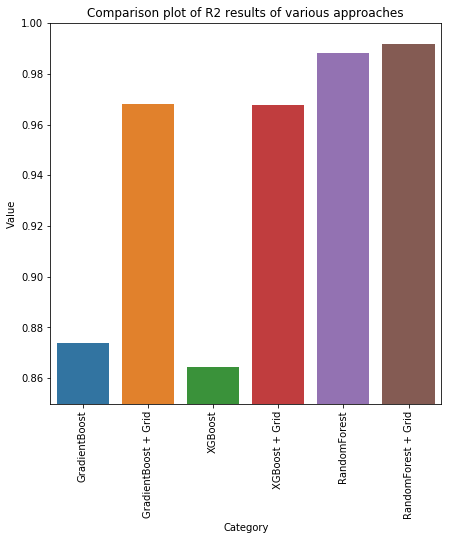

In [349]:
plt.figure(figsize=(7,7))
plt.title('Comparison plot of R2 results of various approaches')
chart = sns.barplot(x=r2_results_df.Category, y=r2_results_df.Value, data=r2_results_df)
plt.ylim(0.85,1)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

[Text(0, 0, 'RMSE of Train with GradientBoost'),
 Text(0, 0, 'RMSE of Train with GradientBoost + Grid'),
 Text(0, 0, 'RMSE of Train with XGBoost'),
 Text(0, 0, 'RMSE of Train with XGBoost + Grid'),
 Text(0, 0, 'RMSE of Train with RandomForest'),
 Text(0, 0, 'RMSE of Train with RandomForest + Grid')]

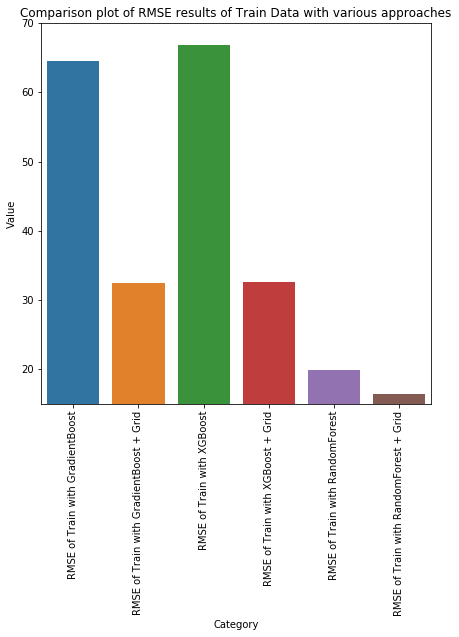

In [347]:
plt.figure(figsize=(7,7))
plt.title('Comparison plot of RMSE results of Train Data with various approaches')
chart = sns.barplot(x=RMSE_train_df.Category, y=RMSE_train_df.Value, data=RMSE_train_df)
plt.ylim(15,70)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

[Text(0, 0, 'RMSE of Test with GradientBoost'),
 Text(0, 0, 'RMSE of Test with GradientBoost + Grid'),
 Text(0, 0, 'RMSE of Test with XGBoost'),
 Text(0, 0, 'RMSE of Test with XGBoost + Grid'),
 Text(0, 0, 'RMSE of Test with RandomForest'),
 Text(0, 0, 'RMSE of Test with RandomForest + Grid')]

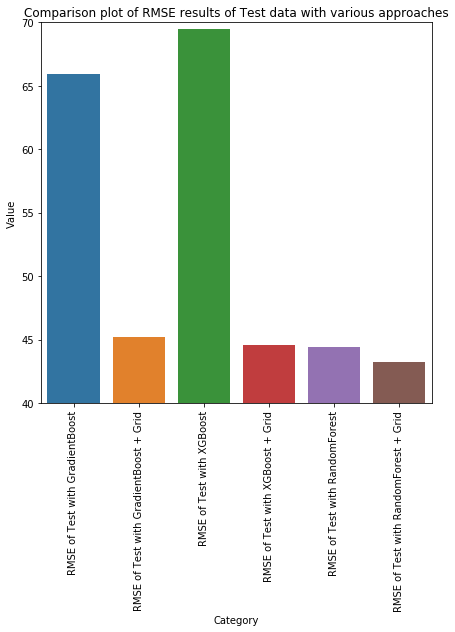

In [346]:
plt.figure(figsize=(7,7))
plt.title('Comparison plot of RMSE results of Test data with various approaches')
chart = sns.barplot(x=RMSE_test_df.Category, y=RMSE_test_df.Value, data=RMSE_test_df)
plt.ylim(40,70)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

[Text(0, 0, 'RMSE of Test with GradientBoost'),
 Text(0, 0, 'RMSE of Test with GradientBoost + Grid'),
 Text(0, 0, 'RMSE of Test with XGBoost'),
 Text(0, 0, 'RMSE of Test with XGBoost + Grid'),
 Text(0, 0, 'RMSE of Test with RandomForest'),
 Text(0, 0, 'RMSE of Test with RandomForest + Grid')]

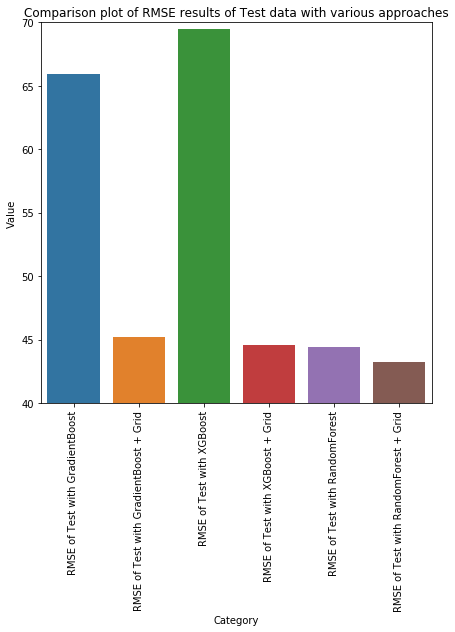

In [345]:
plt.figure(figsize=(7,7))
plt.title('Comparison plot of RMSE results of Test data with various approaches')
chart = sns.barplot(x=RMSE_test_df.Category, y=RMSE_test_df.Value, data=RMSE_test_df)
plt.ylim(40,70)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

# Conclusions

##### The time and atime columns are highly correlated, so it is better to drop either of the column for better modelling.
##### The datetime column is divided into multiple columns, like date, day, weekday, month.
##### We have dropped one more column 'weather_ Heavy Rain + Thunderstorm ' as it was having only one record with this value. That we have conclude form the visualizations.
##### There were few outliers in the train dataset as the values were greater than the mean + 3*std dev, so replaced those with the mean value as a part of outlier analysis.

##### Used Linear Regression with GradientBoost, XGBoost and Randomforest Regressor for modelling
##### From Feature importances, we can see that the top 5 most important features were, 
    1. hour - 0.6
    2. temp/atemp - 0.1
    3. year - 0.089
    4. workingday - 0.072
    5. Humidity - 0.036

##### The best method found to be Randomforest Regressor.
##### Used GridSearchCV to tune the model, which resulted in best params as for Randomforest Regressor
    n_estimators=1000
    
##### Although the difference of RMSE of Train and Test data for Randomforest Regressor with Parameter Tuning is a more than the other models but the RMSE of both Train and Test data is reduced significantly.
##### The results from the barplot is also scaled from certain limits so that it can be visible better and differentiable.